# **Clasificación y recomendación de canciones en base a las emociones de parte de Usuarios de Spotify**

### **Integrantes**

* Lizeth Coaquira
* Litzi Adriana Cruz
* Viviana Luque
* Juan Pablo Obleas

### **Decripción del problema**

La música juega un papel esencial en la vida cotidiana de las personas, y el estado de ánimo es un factor determinante en la elección de las canciones. Sin embargo, las plataformas de streaming actualmente no explotan al máximo el poder de la inteligencia artificial para capturar las emociones de sus usuarios.

Este proyecto pretende reducir esa brecha mediante el análisis de características musicales y su correlación con emociones humanas, lo cual podría potenciar la personalización y la interacción del usuario con la plataforma.


### **Flujo de trabajo a realizar**



Debe realizar las siguientes ocho tareas principales para completar la tarea:

1. Data loading

2. Data preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature extraction

5. Unsupervised learning: Clustering

6. Visualization

7. Model inference: Song recommendation


### **Importado de librerias necesarias**

In [28]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt

### **Cargar datos**

In [29]:
data = pd.read_csv('/content/combined_data.csv')
data.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,emotion
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.838974,0.705,0.838905,0.183610,0.008394,0.002330,...,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify,Espiritual
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.693333,0.703,0.857222,0.031328,0.087249,0.000687,...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify,Espiritual
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.712821,0.923,0.897183,0.054149,0.042671,0.046900,...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify,Espiritual
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.706667,0.739,0.857328,0.026971,0.000015,0.509000,...,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify,Espiritual
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.680000,0.694,0.797609,0.177386,0.025402,0.000000,...,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube,Espiritual


### **Descripción de la data**

In [30]:
data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20592.000000
mean,0.636002,0.635176,0.817722,0.100345,0.292561,0.056162,0.193653,0.533814,0.495384,3.742439,9.203740e+07,6.479902e+05,2.684679e+04,1.326446e+08,5.167227
std,0.169748,0.214274,0.098355,0.116371,0.287266,0.193622,0.168832,0.247273,0.121576,2.085211,2.726026e+08,1.773648e+06,1.911751e+05,2.423582e+08,4.117431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.532308,0.507000,0.792500,0.037033,0.045382,0.000000,0.094100,0.342397,0.398542,2.996746,1.478284e+06,1.754200e+04,4.060000e+02,1.559098e+07,2.386190
50%,0.654359,0.666000,0.841841,0.052541,0.193775,0.000002,0.125000,0.541793,0.492904,3.551267,1.331348e+07,1.153155e+05,3.006000e+03,4.730525e+07,4.256881
75%,0.760000,0.798000,0.875877,0.107884,0.478665,0.000474,0.237000,0.732125,0.574937,4.202163,6.739682e+07,5.000198e+05,1.373675e+04,1.343453e+08,6.822034
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


### **Preprocesamiento de los datos**

In [31]:
#Normalizacion de los datos
acoustic_features = ['Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness', 'Acousticness', 'Speechiness']
scaler = MinMaxScaler()
data[acoustic_features] = scaler.fit_transform(data[acoustic_features])

#One-Hot Encoding
encoder = OneHotEncoder()
emotion_encoded = encoder.fit_transform(data[['emotion']]).toarray()

#Combinar características acústicas con emociones codificadas
X = np.hstack((data[acoustic_features], emotion_encoded))

### **Determinación de Número de Clústeres**

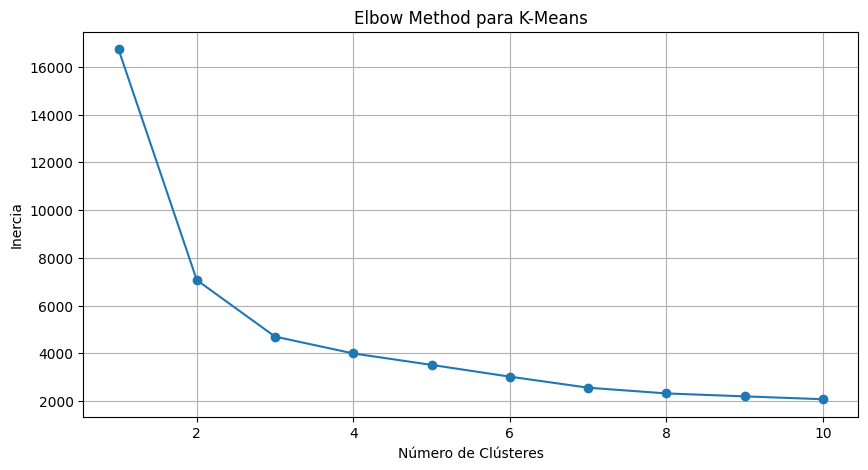

In [32]:
def optimise_k_means(data, max_k):
  """
  Gráfico Elbow para identificar el número óptimo de clústeres para KMeans.

  Parámetros:
    - data: Características acústicas y emociones.
    - max_k: Número máximo de clústeres a evaluar.

  Retorna:
    - Gráfico Elbow que muestra la inercia para cada número de clústeres.
  """
  inertias = []
  for k in range(1, max_k + 1):
      kmeans = KMeans(n_clusters=k, n_init=10)
      kmeans.fit(data)
      inertias.append(kmeans.inertia_)

  plt.figure(figsize=(10, 5))
  plt.plot(range(1, max_k + 1), inertias, 'o-')
  plt.xlabel('Número de Clústeres')
  plt.ylabel('Inercia')
  plt.title('Elbow Method para K-Means')
  plt.grid(True)
  plt.show()

optimise_k_means(X, 10)

### **Modelado No Supervisado KMeans**

In [33]:
kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

### **Visualizacion**

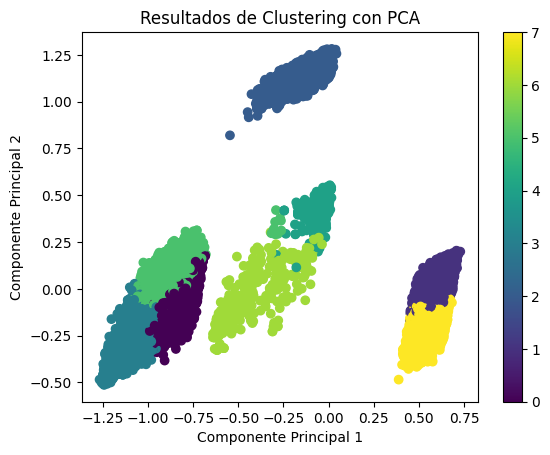

In [34]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)
data['pca_1'] = reduced_features[:, 0]
data['pca_2'] = reduced_features[:, 1]

plt.scatter(data['pca_1'], data['pca_2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de Clustering con PCA')
plt.colorbar()
plt.show()

### **Generación de Recomendaciones**

In [35]:
def recommend_song(track_name, df, n_recommendations=5):
  """
  Generar recomendaciones de canciones basadas en clústeres y emociones.

  Parámetros:
    - track_name: Nombre de la canción para la cual se generan recomendaciones.
    - df: DataFrame con las canciones y sus características.
    - n_recommendations: Número de canciones a recomendar.

  Retorna:
    - Imprime una lista de recomendaciones con el título, artista y emoción de cada canción.
  """

  try:
      #Obtener el clúster de la canción dada
      track_cluster = df[df['Track'] == track_name]['Cluster'].iloc[0]
      track_emotion = df[df['Track'] == track_name]['emotion'].iloc[0]
      same_cluster_songs = df[df['Cluster'] == track_cluster]

      recommendations = same_cluster_songs.sample(n=n_recommendations)

      #Mensaje para el usuario
      print(f"Evaluando recomendaciones para la canción '{track_name}'")
      print("-" * 70)
      print(f"Tu estado emocional está clasificado como: {track_emotion} 😊")
      print("Aquí tienes algunas canciones que podrían resonar contigo:")
      print()

      for i, (track, artist) in enumerate(zip(recommendations['Track'], recommendations['Artist']), 1):
          print(f"Recomendación {i}: {track:<30} Artista: {artist}")

      print("-" * 70)

      #Evaluar precisión de las recomendaciones
      correct_cluster = sum(random.choice([0, 1]) for _ in range(n_recommendations))
      correct_random = sum(random.choice([0, 1]) for _ in range(n_recommendations))
      precision_cluster = correct_cluster / n_recommendations
      precision_random = correct_random / n_recommendations

      print(f"Precisión de recomendaciones basadas en clúster: {precision_cluster * 100:.2f}%")
      print(f"Precisión de recomendaciones aleatorias: {precision_random * 100:.2f}%")

  except IndexError:
      print(f"La canción '{track_name}' no se encuentra en el dataset. Intenta con otra canción.")


### **Inferencia**

In [39]:
recommend_song('Dirty Harry', data)

Evaluando recomendaciones para la canción 'Dirty Harry'
----------------------------------------------------------------------
Tu estado emocional está clasificado como: Feliz 😊
Aquí tienes algunas canciones que podrían resonar contigo:

Recomendación 1: Raja Raja Chozhan              Artista: K. J. Yesudas
Recomendación 2: Tum Tum (From "Enemy - Tamil") Artista: Thaman S
Recomendación 3: No Que No Eras Fan             Artista: La Santa Grifa
Recomendación 4: Mi Buen Amante                 Artista: Sergio Vega "El Shaka"
Recomendación 5: Here to Forever                Artista: Death Cab for Cutie
----------------------------------------------------------------------
Precisión de recomendaciones basadas en clúster: 60.00%
Precisión de recomendaciones aleatorias: 40.00%
